In [281]:
target_names = ['setosa', 'versicolor', 'virginica']
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [282]:
import numpy as np
import matplotlib.pyplot as plt

In [283]:
def load_data():
    data = np.loadtxt('iris.csv', delimiter=',', skiprows=1)
    return data

In [284]:
# 加载数据，获取前100个样本，前2个标签
data = load_data()
x = data[0:100, 0:2]
y = data[0:100, 4:5]
print(x.shape)
print(y.shape)

# 数据标签扩充，添加偏置
one = np.ones((x.shape[0],1))
new_x = np.hstack((one, x))

(100, 2)
(100, 1)


In [285]:
class logistic_regression:
    def __init__(self, x, y, learning_rate=0.001, n_iters=1000):
        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.Loss = []
    
    def output(self):
        out = self.x @ self.weights
        return out

    def sigmoid(self, out):
        return 1 / (1 + np.exp(-out))

    def compute_loss(self):
        out = self.output()
        re = self.sigmoid(out)
        loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))
        loss = loss/self.x.shape[0]
        dw = (self.x.T @ (re - self.y))
        return loss, dw
    
    def train(self):
        features_num = self.x.shape[1]
        self.weights = 0.001 * np.random.randn(features_num, 1)
        self.show()
        for i in range(1, self.n_iters+1):
            loss, dw = self.compute_loss()
            self.weights -= self.learning_rate * dw
            self.Loss.append(loss)
            if i % 1000 == 0:
                self.show()
                
    def predict(self, input_x):
        pass

    def show(self):
        plt.clf()
        x1 = np.arange(4, 7.5, 0.05)
        y1 = -(self.weights[0] + self.weights[1] * x1) / self.weights[2]
        plt.plot(x1, y1)
        plt.scatter(x[0:50, 0], x[0:50, 1], marker='o', c='r')
        plt.scatter(x[50:100, 0], x[50:100, 1], marker='o', c='b')
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
        plt.show()
        plt.pause(1)



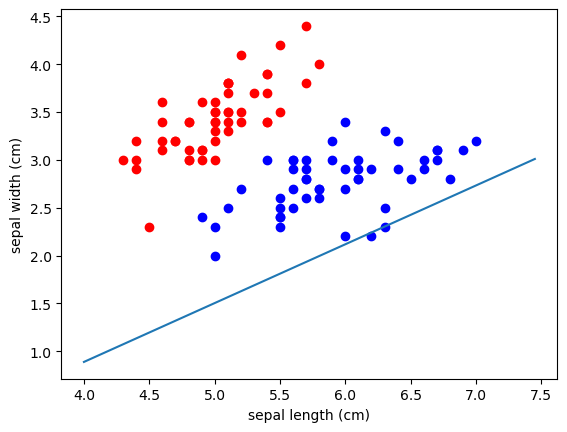

/tmp/ipykernel_686124/776554420.py:20: RuntimeWarning: divide by zero encountered in log
  loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))
/tmp/ipykernel_686124/776554420.py:20: RuntimeWarning: invalid value encountered in matmul
  loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))


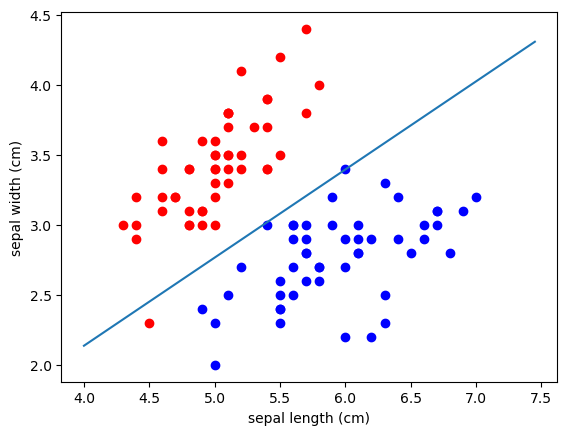

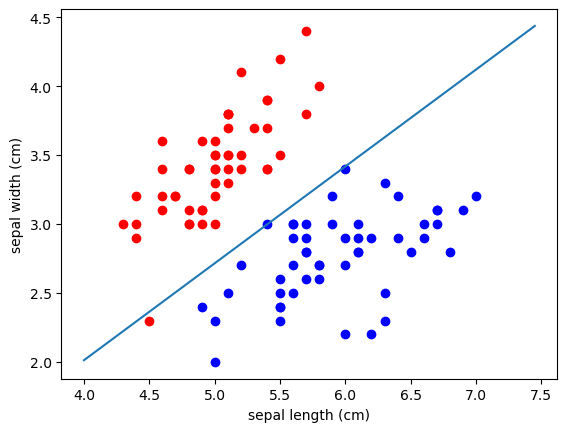

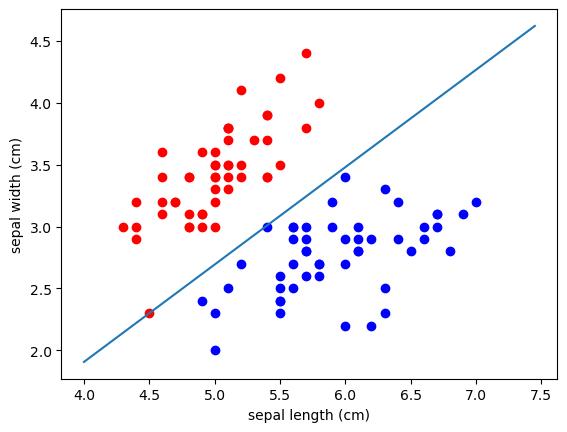

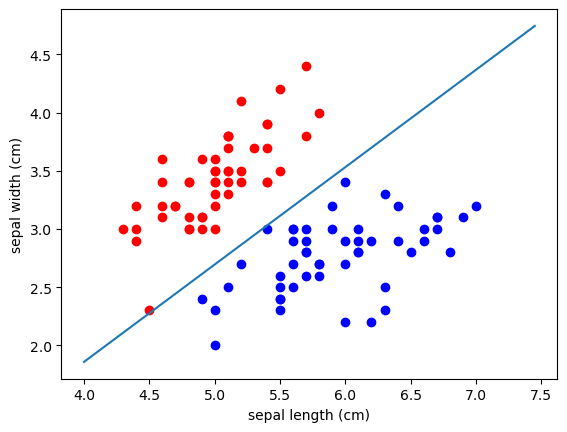

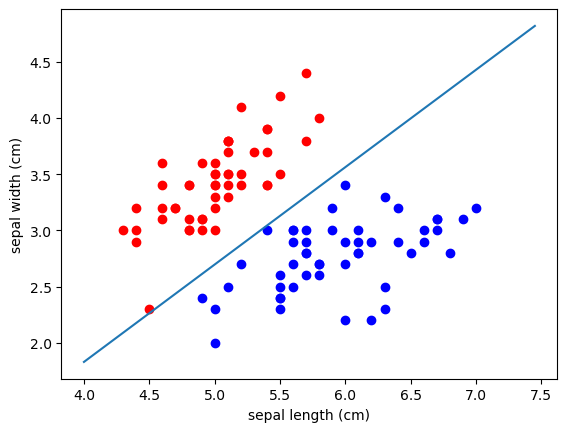

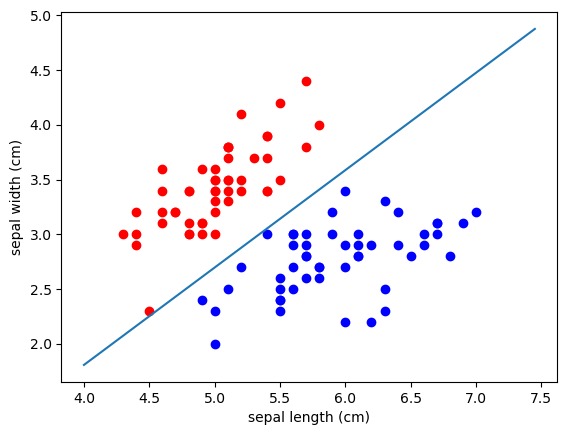

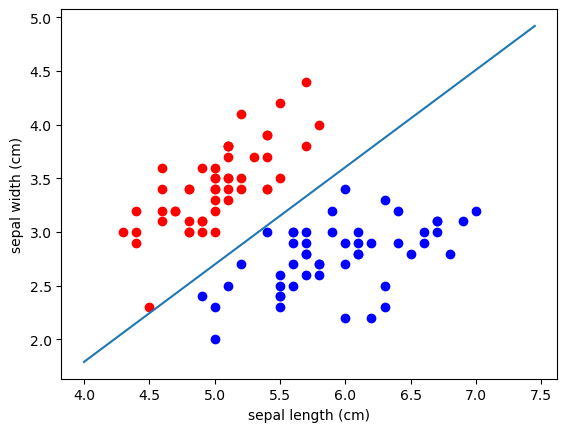

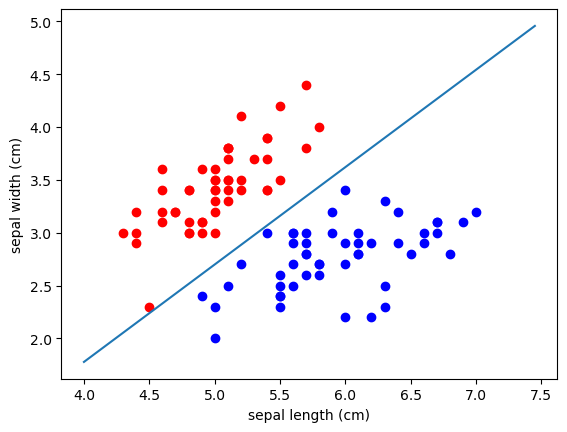

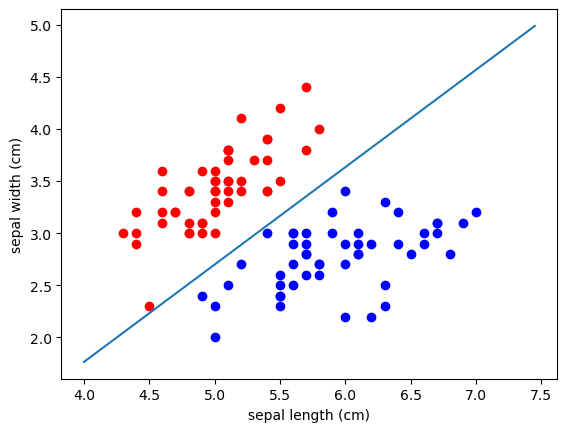

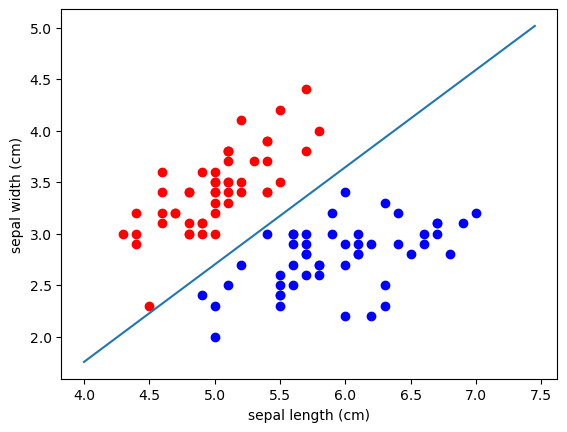

In [286]:
logistic = logistic_regression(new_x, y, learning_rate=0.1, n_iters=10000)
logistic.train()